### Baseline

In [2]:
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")
from utils import *
import warnings
warnings.filterwarnings("ignore")
import os
import psutil

pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 
from catboost import CatBoostClassifier, Pool

### "F35" GroupBy mean 변환

In [2]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:33<00:00,  1.27s/it]


---------------- Change Dtype ----------------
Memory usage of dataframe is 11785.06 MB
Memory usage after optimization is: 7447.50 MB
Decreased by 36.8%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:04<00:00,  5.33it/s]


---------------- Change Dtype ----------------
Memory usage of dataframe is 1835.20 MB
Memory usage after optimization is: 1168.64 MB
Decreased by 36.3%
0.7790372912643618


In [3]:
X_train

,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F35_F04_mean,F35_F06_mean,F35_F11_mean,F35_F14_mean,F35_F18_mean,F35_F19_mean,F35_F24_mean,F35_F27_mean,F35_F29_mean,F35_F32_mean,F35_F33_mean,F35_F36_mean,F35_F38_mean,F2729_add
13803063,HFKFYBT,WGRPKJJ,NaN,4.0,HHIVWCS,6,PQZBVMG,SODVHOK,WYGJSUC,TNCSGXT,5.0,BZIJZDQ,VEPNXII,4,NaN,MWJKXQV,QABXFTY,4.0,0.0,NaN,BUUUKVW,NJMESZA,IDHAIQQ,0.0,PRPYEAO,NaN,0.0,RSJLBWR,0.0,FGOVFJM,WHSRKIM,4000.0,0.0,CMKASDZ,IRUDRFB,4.0,ABDGSWK,0.0,NXGSDNU,25.453125,117.8125,367.75,10.492188,5.515625,0.352539,66.9375,17.296875,3.074219,5711.475586,2.066406,6.570312,0.203857,0.0
3478273,PNTDISF,DJDKEYH,NaN,1.0,MLMWAUM,3,GTCBZMF,VAWXMCR,QVWMWUT,ZKSZGMV,62.0,NHBSGOB,OYLJLYE,1,NaN,ZQEGITQ,QANMWXR,1.0,0.0,NaN,YBGYGNW,NXBZHKD,MZNWJWI,6.0,XARTBUB,NaN,2.0,YYEFTXW,1.0,NZGEZLW,GTISJWW,8428.0,0.0,BIMGSNJ,IRUDRFB,1.0,CEKWPPW,0.0,TKKNKPZ,25.453125,117.8125,367.75,10.492188,5.515625,0.352539,66.9375,17.296875,3.074219,5711.475586,2.066406,6.570312,0.203857,3.0
10164014,LLKAVMO,EKJSVRG,NaN,5.0,YKHABYT,0,MTPBIET,LPYPUNA,PSBJDMA,MTOLQPU,1.0,RDDXPRS,DBXROKY,33,NaN,DBABTTS,TEHYADQ,23.0,1.0,NaN,PZZCPEK,SNDDHSM,VTYMMMX,42.0,UWUHPCV,NaN,0.0,YYEFTXW,0.0,NZGEZLW,CNEYHMW,413.0,1.0,ABEHJLN,IRUDRFB,23.0,ZIRTYOB,0.0,ZHVURWN,25.453125,117.8125,367.75,10.492188,5.515625,0.352539,66.9375,17.296875,3.074219,5711.475586,2.066406,6.570312,0.203857,0.0
27771629,BQJMZDP,RGOJRWX,PCCSJYL,7.0,EIASQKQ,0,BYLWVLT,FTPHMPQ,HJHKOLU,XPSTDMS,57.0,XSAXBVD,ZYXNIFT,0,ZNLREKK,FLSTJON,ORHLUGM,0.0,1.0,FMJVSAF,BUUUKVW,SNDDHSM,SOIJWKV,0.0,VIJZRJT,YYQVFBZ,0.0,MAVCFCM,0.0,UAPELIR,GTISJWW,2.0,4.0,VMKJQCF,IRUDRFB,0.0,NNSGHCV,0.0,PBXEJNH,25.453125,117.8125,367.75,10.492188,5.515625,0.352539,66.9375,17.296875,3.074219,5711.475586,2.066406,6.570312,0.203857,0.0
11550137,NaN,NaN,NaN,6.0,NaN,1,SUIATQN,MIGYEEG,WCAAYEJ,NaN,499.0,NaN,NXHSLVD,7,NaN,PKIUOUL,QANMWXR,6.0,0.0,NaN,BJAYVHN,MQBFEMR,VTYMMMX,234.0,IJINYWB,NaN,3.0,IYZTLFQ,1.0,NZGEZLW,GTISJWW,11554.0,0.0,NaN,IRUDRFB,6.0,LFJKFHO,0.0,EFVRMLF,25.453125,117.8125,367.75,10.492188,5.515625,0.352539,66.9375,17.296875,3.074219,5711.475586,2.066406,6.570312,0.203857,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295020,TVWQYKH,ZAYPPJH,IAGJDOH,3.0,FCGUWGL,9,PQZBVMG,FTPHMPQ,CCYWRAP,ZFLNWRA,867.0,NZAANFB,OQNZJHK,17,ZNLREKK,LMUYGSE,QANMWXR,6.0,0.0,WTQNFUQ,YBGYGNW,SNDDHSM,IDHAIQQ,115.0,VZERVFK,WVRHGBC,22.0,YBZKRWS,8.0,NZGEZLW,GTISJWW,14698.0,0.0,WBRNLYI,IRUDRFB,17.0,RTZZYBQ,0.0,OJJPIAS,25.453125,117.8125,367.75,10.492188,5.515625,0.352539,66.9375,17.296875,3.074219,5711.475586,2.066406,6.570312,0.203857,30.0
996962,LLKAVMO,EKJSVRG,NaN,0.0,YKHABYT,12,KKMYOTL,LPYPUNA,AFRHAWT,MTOLQPU,261.0,RDDXPRS,DBXROKY,2,NaN,BTMTAHB,ORHLUGM,2.0,1.0,NaN,PZZCPEK,RGDWSBL,IDHAIQQ,2.0,VURYQFB,NaN,0.0,STJSBJK,0.0,VNUTGDW,CNEYHMW,17.0,2.0,ABEHJLN,IRUDRFB,2.0,ZIRTYOB,0.0,RZJQFRG,25.453125,117.8125,367.75,10.492188,5.515625,0.352539,66.9375,17.296875,3.074219,5711.475586,2.066406,6.570312,0.203857,0.0
13650257,VHLLSXG,DJDKEYH,NaN,0.0,BJMUDNF,2,PQZBVMG,FTPHMPQ,XDPOJYJ,ZKSZGMV,0.0,UXONYAK,HFEPSLZ,5,NaN,NJWWIGX,QABXFTY,5.0,0.0,NaN,BUUUKVW,XLJQWYS,IDHAIQQ,0.0,RMWXTFL,NaN,0.0,YYEFTXW,0.0,WVTRIIE,GTISJWW,41.0,0.0,VXXUNFA,IRUDRFB,5.0,KYQTBXN,0.0,VSCAKME,25.453125,117.8125,367.75,10.492188,5.515625,0.352539,66.9375,17.296875,3.074219,5711.475586,2.066406,6.570312,0.203857,0.0
9074937,JCDXFYU,PILDDJU,IAGJDOH,1.0,LFPUEOV,0,BCNRWPA,FTPHMPQ,CEEUKXR,YLKUVQA,623.0,MGRUYII,GTQXVZY,3,ZNLREKK,QOCOQZK,ORHLUGM,1.0,0.0,TGVLSYT,LUBUFOT,SNDDHSM,WADCLQA,0.0,JEISAYE,WVRHGBC,22.0,YYEFTXW,3.0,GSKQQNY,KHZNEZF,2867.0,0.0,QMOULXS,IRUDRFB,1.0,LJWUPTR,0.0,YINTNCW,25.453125,117.8125,367.75,10.492188,5.515625,0.352539,66.9375,17.296875,3.074219,5711.475586,2.066406,6.570312,0.203857,25.0


<Axes: title={'center': 'Top 20 features'}>

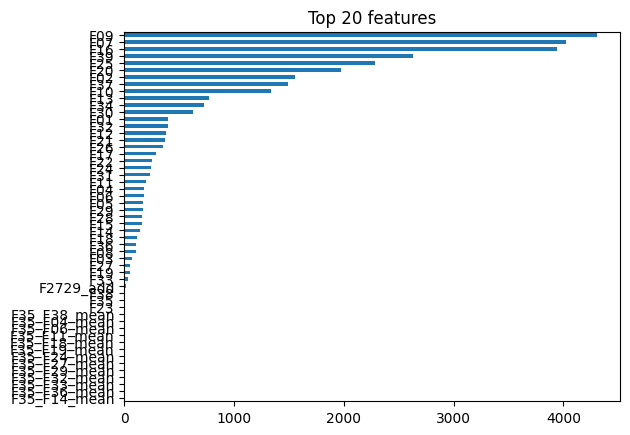

In [4]:
importances = pd.Series(model.feature_importances_, X_train.columns)
import matplotlib.pyplot as plt

n=20
plt.title(f'Top {n} features')
importances.sort_values().plot.barh()

### "F31" GroupBy mean 변환

In [2]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:33<00:00,  1.30s/it]


---------------- Change Dtype ----------------
Memory usage of dataframe is 11785.06 MB
Memory usage after optimization is: 7392.94 MB
Decreased by 37.3%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:04<00:00,  5.23it/s]


---------------- Change Dtype ----------------
Memory usage of dataframe is 1835.20 MB
Memory usage after optimization is: 1159.98 MB
Decreased by 36.8%
0.7788960845758308


In [ ]:
importances = pd.Series(model.feature_importances_, X_train.columns)
import matplotlib.pyplot as plt

n=20
plt.title(f'Top {n} features')
importances.sort_values().plot.barh()

### "F17" GroupBy mean 변환

In [2]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:32<00:00,  1.26s/it]


---------------- Change Dtype ----------------
Memory usage of dataframe is 11785.06 MB
Memory usage after optimization is: 7447.50 MB
Decreased by 36.8%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:04<00:00,  5.27it/s]


---------------- Change Dtype ----------------
Memory usage of dataframe is 1835.20 MB
Memory usage after optimization is: 1168.64 MB
Decreased by 36.3%
0.7789055213763966


<Axes: title={'center': 'Top 20 features'}>

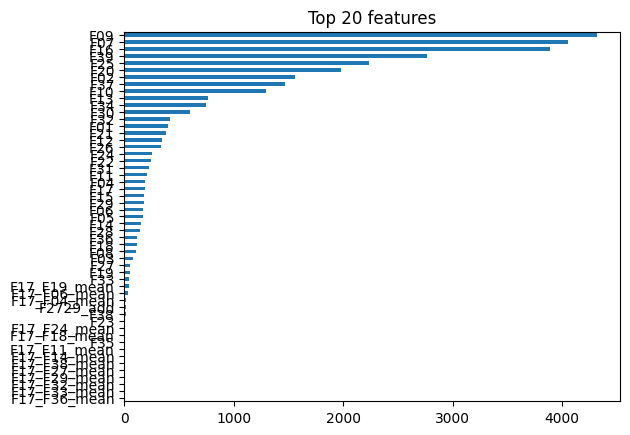

In [3]:
importances = pd.Series(model.feature_importances_, X_train.columns)
import matplotlib.pyplot as plt

n=20
plt.title(f'Top {n} features')
importances.sort_values().plot.barh()

### "F15" GroupBy mean 변환

In [3]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

''' Train / Vaild Split'''
X_train = train.drop(columns = ["Click"]) 
y_train = train["Click"]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

param = {'max_depth': 30,
 'num_leaves': 306,
 'subsample': 0.9757365622458185,
 'subsample_freq': 8,
 'min_child_samples': 136}

model = lgb.LGBMClassifier(random_state=42, **param)
model.fit(X_train, y_train, eval_metric='AUC')
pred = model.predict_proba(X_valid)
score = roc_auc_score(y_valid, pred[:, 1])
print(score)


---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:33<00:00,  1.28s/it]


---------------- Change Dtype ----------------
Memory usage of dataframe is 11785.06 MB
Memory usage after optimization is: 7392.94 MB
Decreased by 37.3%
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:04<00:00,  5.29it/s]


---------------- Change Dtype ----------------
Memory usage of dataframe is 1835.20 MB
Memory usage after optimization is: 1159.98 MB
Decreased by 36.8%
0.7788926330938677


<Axes: title={'center': 'Top 20 features'}>

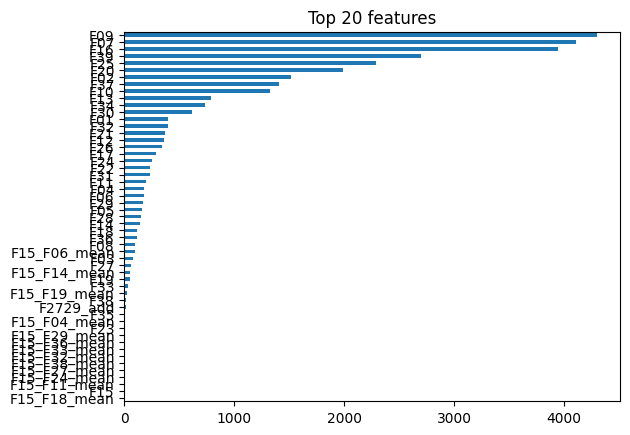

In [4]:
importances = pd.Series(model.feature_importances_, X_train.columns)
import matplotlib.pyplot as plt

n=20
plt.title(f'Top {n} features')
importances.sort_values().plot.barh()